# Analisi iniziale

In [30]:
import pandas as pd
import numpy as np

#warnings
import warnings
warnings.filterwarnings('ignore') #ignoring warnings

#plots
import matplotlib.pyplot as plt
import seaborn as sns

#font scale
sns.set(font_scale=1.5)

In [2]:
#importing my custom functions
from custom_functions.plots import *

 
    The get_label() function appends the labels to a seaborn plot. Arguments in the following order:
    Title, x label, y label
    
 
    The plot(kde) function plots the KDE. Inputs are just real and predicted y values, in this order:
    y_test, y_test_pred
    
 
    The scatter_with_regr() function plots actual vs predicted values with a regression line.
    Arguments in the following order:
    y_test, y_test_pred
    
 
    The plot_residuals() function plots the residuals. Arguments have to be passed in thid order:
    y_test, y_test_pred, title, x_label and y_label.
    REMEMBER: when invoking the function, y_test e y_test_pred have to be passed
    with no quotation marks if are not from
    the same dataframe (as usually it is).
    Then, pass: title, x_label and y_label (usying quotation marks)
    


In [3]:
#reading data
df = pd.read_csv('130k.csv')

#showing head
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


The dataset is composed of:
- the state in which the wine is produced
- the description of the wine
- the name of the wine
- the points indicating the satisfaction (0-100)
- the price (let's assume it is the price of the bottle in dollars)
- the region of production
- the region of production
- the name of the taster (and his Twitter)
- the 'title' (the title page of the bottle)
- the variety
- the winery (the retailer)

For the analysis that I want to do, the columns "region_1" and "region_2" do not interest me (I am fine with the "province"); I don't even care about the name of the tester, nor his twitter; I can, therefore, delete these columns.

In [4]:
#dropping unnecessary columns
df = df.drop(['region_1', 'region_2', 'taster_name', 'taster_twitter_handle'], axis=1)

#showing new head
df.head()

,Unnamed: 0,country,description,designation,points,price,province,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [49]:
#checking dataframe shape
df.shape

(129971, 10)

In [50]:
#checking for Nans
df.isnull().sum()

Unnamed: 0         0
country           63
description        0
designation    37465
points             0
price           8996
province          63
title              0
variety            1
winery             0
dtype: int64

There's a lot of NaNs in the column "price". The percentage of NaNs in this column with respect of the total values in the column itself is:

In [51]:
#NaNs in the "price" column
price_nans = df['price'].isnull().sum()

#total number of occurrencies in the 'price' column (which is the same value for all the columns)
total_price = df.shape[0]

#percentage of NaNs with respect to the total occurrencies in the "price" column
perc_nan = (price_nans/total_price)*100

print(f'the NaNs in the price column are {price_nans}')
print(f'the total occurrencies in the price column is {total_price}')
print(f'the percentage of NaNs in the price column is {perc_nan: .1f}%')

the NaNs in the price column are 8996
the total occurrencies in the price column is 129971
the percentage of NaNs in the price column is  6.9%


Since price is something I'm really interested in analyzing, the fact that that the 7% of the values are $NaNs$ may cause some troubles in the upcoming analysis. So, in this case, we have better to drop thoese columns instead of filling with 0 or with the median values. Let's do this:

In [13]:
#droping Nans
df_cleaned = df.dropna(axis=0)

#showing new shape
df_cleaned.shape

(86148, 10)

# Variables study

Theoretically, the more expensive a wine, the better it is; so I asked myself: is there a correlation between the price and the score received by the wine?


Then I create a sub-dataframe with only the price and the score to do a correlation analysis:

In [14]:
#creating a subdataframe with just price and points
price_point = df_cleaned[['price', 'points']]

<AxesSubplot:>

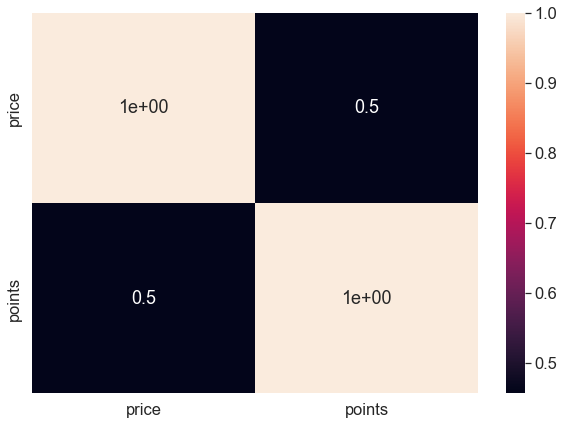

In [15]:
#figure size
plt.figure(figsize=(10, 7))

#heat map for correlation coefficient
sns.heatmap(price_point.corr(), annot=True, fmt="0.1")

There is no great correlation between the price and the points a bottle reached, so a higher price does not necessarily mean a higher point reached.

Now, I do some graphs. First, I study prices by region to see if there is any trend. For example, considering that Italian and French wines are among the most sought after because they are the best in the world, I expect to find outliers in these areas:

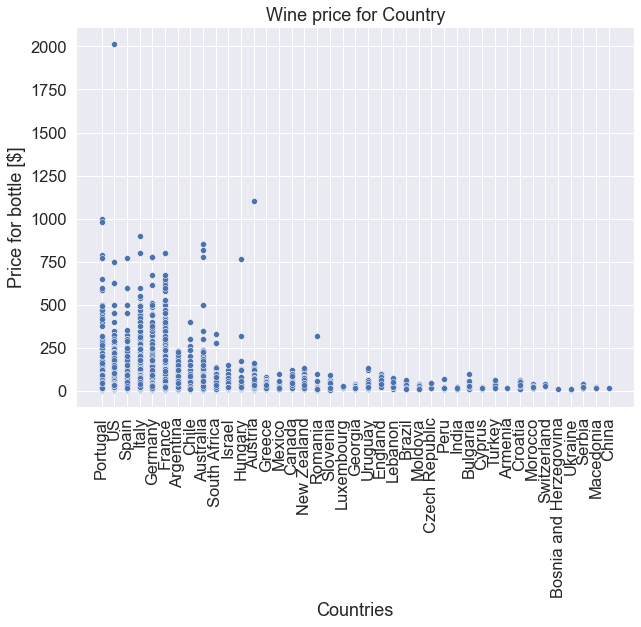

In [16]:
#figure size
plt.figure(figsize=(10, 7))

#rotating x-axis values
plt.xticks(rotation = 'vertical')

#plot
sns.scatterplot(data=df_cleaned, x='country', y='price')

#labeling (usying my custom functions)
get_label('Wine price for Country', 'Countries', 'Price for bottle [$]')

To my great surprise, I see that the highest prices are somehow spread in the whole Europe. Furtemore: we have an important outlier in the US!

Let's see, with a violin plot, how the price is dispersed for country with a violin plot:

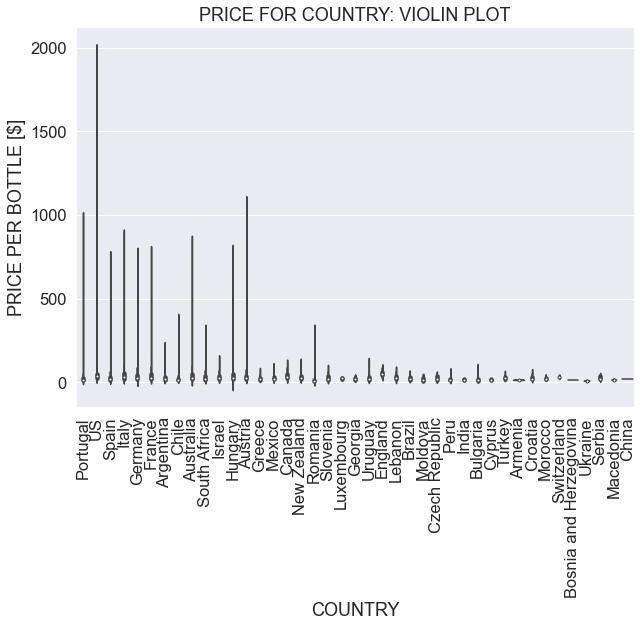

In [25]:
#figure size
plt.figure(figsize=(10, 7))

#violin plot
sns.violinplot(data=df_cleaned, x='country', y='price')

#rotating x-axis values
plt.xticks(rotation = 'vertical')

#labeling
get_label('PRICE FOR COUNTRY: VIOLIN PLOT', 'COUNTRY', 'PRICE PER BOTTLE [$]')

There is a great dispersion of the price for bottle in the US (and, infact, here we have an importano outlier, as seen before).

Let's see, now, if there is a trend between the state of production and the score obtained.

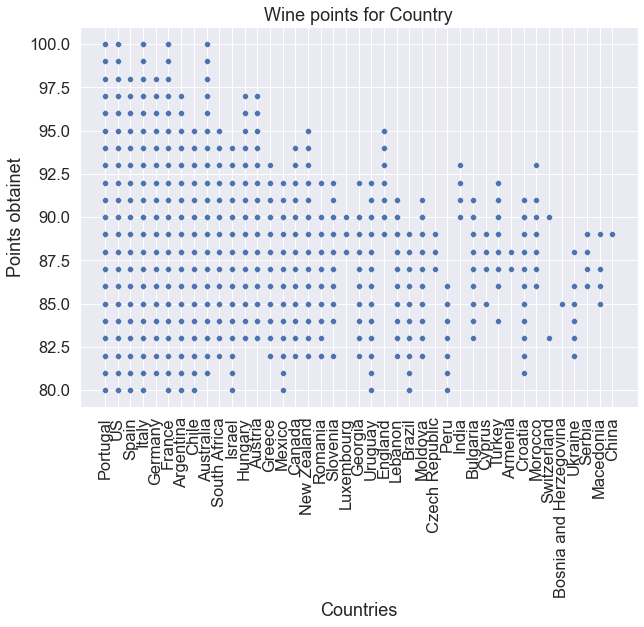

In [17]:
#figure size
plt.figure(figsize=(10, 7))

#rotating x-axis values
plt.xticks(rotation = 'vertical')

#plot
sns.scatterplot(data=df_cleaned, x='country', y='points')

#labeling (usying my custom functions)
get_label('Wine points for Country', 'Countries', 'Points obtainet')

There is no precise trend in the distribution of wine scores based on production status.

Let's see a violin:

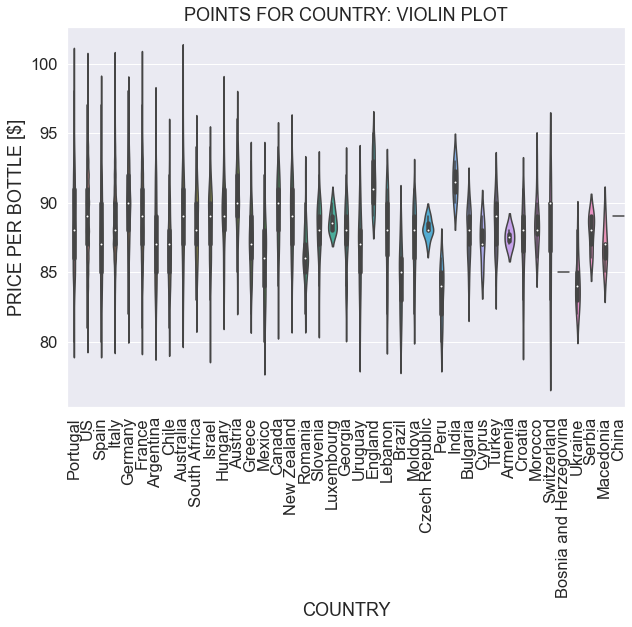

In [26]:
#figure size
plt.figure(figsize=(10, 7))

#violin plot
sns.violinplot(data=df_cleaned, x='country', y='points')

#rotating x-axis values
plt.xticks(rotation = 'vertical')

#labeling
get_label('POINTS FOR COUNTRY: VIOLIN PLOT', 'COUNTRY', 'PRICE PER BOTTLE [$]')

There is also a great dispersion for the points per Country, but here there are some Countries with little dispersion; for example, Luxembourg and Armenia.

# Choice of strategy for a hypothetical wine marketplace<<

At this point, I implement a strategy for a hypothetical wine marketplace. I want to address a medium-high audience, for which I want wines with a good rating but that do not cost excessively (nor that cost 'too little'). Therefore, I choose to want to buy:

- wines with a minimum score of 95

- wines whose maximum price per bottle is 500 $

- wines whose minimum price is $ 50 per bottle

These three conditions must occur simultaneously; this will tell me the initial capital needed to purchase the wines and will also tell me how many different bottles I will have to buy; I will therefore also have to evaluate the space available for storing the bottles: if it were too little, I have to reassess my purchases.
It should also be understood where these wines come from: if the shipping costs are too high, it is not convenient to have them in the marketplace.

In [31]:
#selecting the wines I want
wine = df_cleaned[(df_cleaned['points']>95) & (df['price']>50) & (df['price']<500)]

#showing head
wine.head()

,Unnamed: 0,country,description,designation,points,price,province,title,variety,winery
345,345,Australia,This wine contains some material over 100 year...,Rare,100,350.0,Victoria,Chambers Rosewood Vineyards NV Rare Muscat (Ru...,Muscat,Chambers Rosewood Vineyards
346,346,Australia,"This deep brown wine smells like a damp, mossy...",Rare,98,350.0,Victoria,Chambers Rosewood Vineyards NV Rare Muscadelle...,Muscadelle,Chambers Rosewood Vineyards
348,348,Australia,Deep mahogany. Dried fig and black tea on the ...,Grand,97,100.0,Victoria,Chambers Rosewood Vineyards NV Grand Muscat (R...,Muscat,Chambers Rosewood Vineyards
349,349,Australia,"RunRig is always complex, and the 2012 doesn't...",RunRig,97,225.0,South Australia,Torbreck 2012 RunRig Shiraz-Viognier (Barossa),Shiraz-Viognier,Torbreck
350,350,Italy,"After a few minutes in the glass, this stunnin...",Vignolo Riserva,97,150.0,Piedmont,Cavallotto 2010 Vignolo Riserva (Barolo),Nebbiolo,Cavallotto


In [30]:
wine.shape

(679, 10)

There are 679 different types of wine: a little too many, I have to skim.

Let's imagine, for example, that we only want wines from European countries. Let's see what we have among those selected so far:

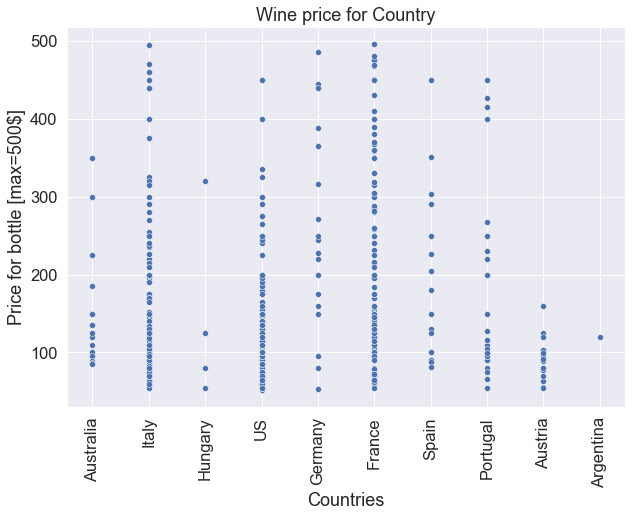

In [31]:
#figure size
plt.figure(figsize=(10, 7))

#rotating x-axis values
plt.xticks(rotation = 'vertical')

#plot
sns.scatterplot(data=wine, x='country', y='price')

#labeling (usying my custom functions)
get_label('Wine price for Country', 'Countries', 'Price for bottle [max=500$]')

To reduce the quantities, I choose wines from:
- Italy
- France
- Spain
- Portugal

So:

In [32]:
#selecting just some countries
wine = wine[(wine['country']=='Italy') | (wine['country']=='France') |
          ( wine['country']=='Spain') | ( wine['country']=='Portugal')]

#new shape
wine.shape

(213, 10)

Hence, our marketplace will have more than 200 different types of wine. Let's calculate the investment to buy a single bottle of wine, for each:

In [33]:
#investment per bottle
investment = wine['price'].sum()

#showing investment
investment

35963.0

Concluding, assuming to create a physical marketplace with the characteristics of the wines indicated above, and assuming to buy two bottles of each type, so as to always have one available, you will need:

In [34]:
#total numbers of bottles
bottles = 2*wine.shape[0]

#initial investment (just bottles)
initial_investment = investment*2

print(f'the number of bottles to buy is: {bottles}')
print(f'the initial investment for only the wine bottles is of: {initial_investment}[$]')

the number of bottles to buy is: 426
the initial investment for only the wine bottles is of: 71926.0[$]
